<a href="https://colab.research.google.com/github/Bmartins25/Mineracao_de_dados_and_LLM_UFMG/blob/main/TP3_fase_1_2_3_Predicao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP3 FASE 1, 2 e 3 - Foco em Técnicas de Predição**

# Alunos: **Bruno Bartolomeu e Carlos Large - Mineração de dados UFMG**

Nome do Dataset: **Olimpíadas 2024 vs PIB**

Origem do Dataset: https://www.kaggle.com/datasets/ernestitus/2024-olympics-medals-vs-gdp

Características do Dataset: **10 Colunas | 7 Colunas numéricas e 3 Colunas texto**

# **Predição**

* A predição é uma técnica de aprendizado supervisionado que busca prever valores futuros ou categorizar dados com base em variáveis de entrada. Diferentes técnicas são utilizadas dependendo do problema e do tipo de dado disponível.


# **Principais Objetivos:**

•	Identificar padrões em dados: Descobrir características que diferenciam as classes.

•	Reduzir incertezas: Oferecer previsões com base em dados históricos.

•	Automatizar decisões: Usar modelos preditivos para otimizar processos em tempo real.

•	Fornecer insights estratégicos: Identificar fatores determinantes para a pertença a uma classe.


# **Em nosso Contexto dos Dados Utilizados:**

Utilizaremos técnicas de predição para analisar cenários específicos com base nos dados de desempenho esportivo e indicadores econômicos, como:

* Número de medalhas conquistadas (ouro, prata, bronze).

* PIB, ano do PIB e população.

* Comparação entre características econômicas e esportivas.

<br>

Exemplo de perguntas respondidas pela predição:

* Qual será o número provável de medalhas de um país em futuras edições das Olimpíadas?

* Um país pertence à classe de alto desempenho esportivo?

* Qual a influência do PIB e da população no número total de medalhas?


# **Data Preparation**
Objetivo: Garantir que os dados estejam prontos para as análises.


* Limpeza de Dados:

   * Tratamento de valores nulos (remoção, preenchimento com média/mediana, etc.).
   * Remoção de duplicatas.

* Transformação de Dados:

   * Normalização das variáveis numéricas para evitar escalas desiguais.
  * Criação de colunas binárias para medalhas (ex.: país ganhou ou não medalha).

* Seleção de Features:

   * Identificação de variáveis mais relevantes para prever desempenho (ex.: medalhas totais).
   * Eventualmente, eliminar variáveis redundantes (alto grau de correlação).

In [197]:
pip install scikit-learn


In [198]:
pip install matplotlib


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN
from itertools import combinations
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay


In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print("Importação bem-sucedida!")


Importação bem-sucedida!


In [201]:
# Carregar o dataset
data = pd.read_csv('/content/Olympics_games_2024.csv', sep=';')
data.columns = [col.strip() for col in data.columns]  # Limpar espaços nos nomes das colunas

In [202]:
# Exibir informações gerais
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   region        90 non-null     object 
 3   gold          90 non-null     int64  
 4   silver        90 non-null     int64  
 5   bronze        90 non-null     int64  
 6   total         90 non-null     int64  
 7   gdp           90 non-null     float64
 8   gdp_year      90 non-null     int64  
 9   population    90 non-null     float64
dtypes: float64(2), int64(5), object(3)
memory usage: 7.2+ KB


In [203]:
# Análise exploratória básica
print("Resumo estatístico:\n", data.describe())

Resumo estatístico:
             gold     silver     bronze       total            gdp  \
count  90.000000  90.000000  90.000000   90.000000      90.000000   
mean    3.644444   3.633333   4.255556   11.533333   24478.053556   
std     7.018933   6.797967   6.586607   19.782071   25547.857382   
min     0.000000   0.000000   0.000000    1.000000    1014.210000   
25%     0.000000   0.000000   1.000000    2.000000    5815.180000   
50%     1.000000   1.000000   2.000000    5.000000   13061.185000   
75%     3.000000   3.000000   5.000000    9.000000   34484.677500   
max    40.000000  44.000000  42.000000  126.000000  103684.880000   

          gdp_year   population  
count    90.000000    90.000000  
mean   2022.977778    69.027778  
std       0.148231   213.286437  
min    2022.000000     0.100000  
25%    2023.000000     5.325000  
50%    2023.000000    12.150000  
75%    2023.000000    48.550000  
max    2023.000000  1428.600000  


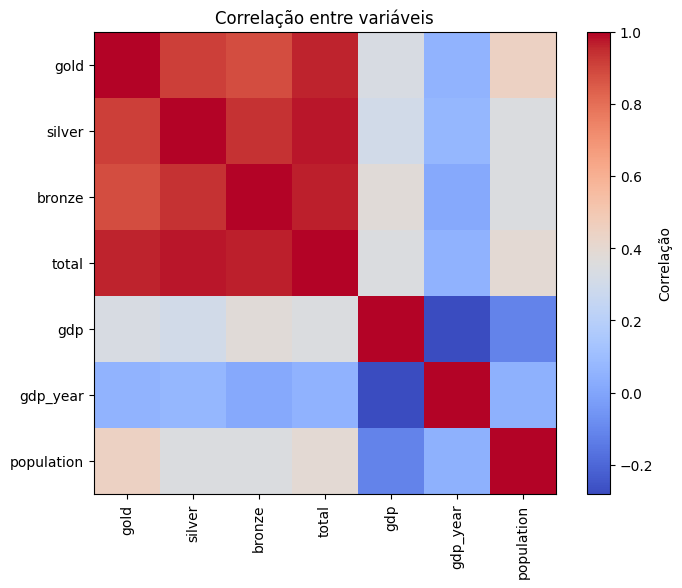

In [204]:
# Visualizar correlação
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr(numeric_only=True)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlação')
plt.title('Correlação entre variáveis')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [205]:
# Preparação dos dados para predição
X = data[['gdp', 'population']]
y = data['total']


In [206]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [207]:
# 1. Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [208]:
# Resultados da Regressão Linear
print("\nRegressão Linear:")
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred_linear))




Regressão Linear:
Erro Quadrático Médio (MSE): 704.9510658028397


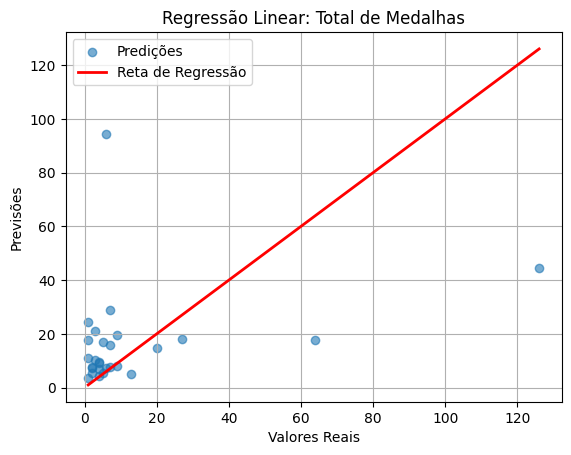

In [209]:
plt.scatter(y_test, y_pred_linear, alpha=0.6, label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Reta de Regressão')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.legend()
plt.title("Regressão Linear: Total de Medalhas")
plt.grid()
plt.show()

In [210]:
# 2. Regressão Logística
# Transformar o problema em binário: Países com mais de 50 medalhas como alta performance
y_binary = (data['total'] > 50).astype(int)
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_bin)
y_pred_logistic = logistic_model.predict(X_test)

In [211]:
# Resultados da Regressão Logística
print("\nRegressão Logística:")
print("Acurácia:", accuracy_score(y_test_bin, y_pred_logistic))
print("Relatório de Classificação:\n", classification_report(y_test_bin, y_pred_logistic))



Regressão Logística:
Acurácia: 0.9259259259259259
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.50      0.50      0.50         2

    accuracy                           0.93        27
   macro avg       0.73      0.73      0.73        27
weighted avg       0.93      0.93      0.93        27



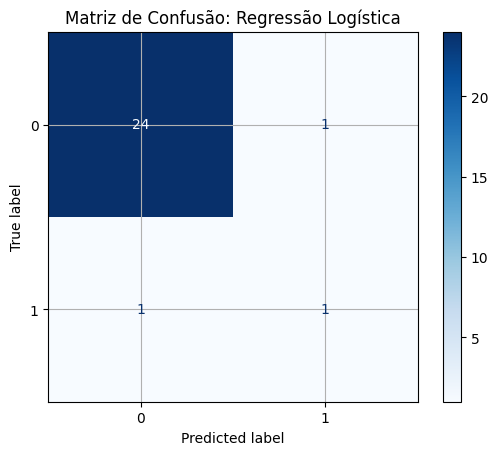

In [212]:
# Gráfico de matriz de confusão para Regressão Logística
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test_bin, cmap='Blues')
plt.title("Matriz de Confusão: Regressão Logística")
plt.grid()
plt.show()

In [213]:
# 3. Árvores de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_bin)
y_pred_tree = tree_model.predict(X_test)



In [214]:
# Resultados da Árvore de Decisão
print("\nÁrvores de Decisão:")
print("Acurácia:", accuracy_score(y_test_bin, y_pred_tree))


Árvores de Decisão:
Acurácia: 0.8888888888888888


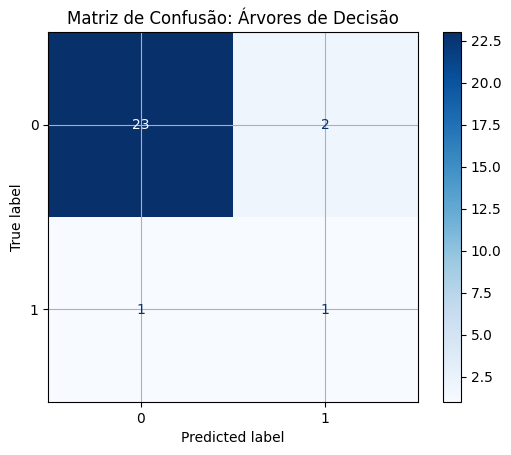

In [215]:
# Gráfico de matriz de confusão para Árvores de Decisão
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test_bin, cmap='Blues')
plt.title("Matriz de Confusão: Árvores de Decisão")
plt.grid()
plt.show()

In [216]:
# Visualização da Árvore de Decisão
from sklearn.tree import export_text

tree_rules = export_text(tree_model, feature_names=list(X.columns))
print(tree_rules)


|--- population <= 813.55
|   |--- gdp <= 43619.89
|   |   |--- class: 0
|   |--- gdp >  43619.89
|   |   |--- population <= 22.25
|   |   |   |--- class: 0
|   |   |--- population >  22.25
|   |   |   |--- population <= 76.40
|   |   |   |   |--- class: 1
|   |   |   |--- population >  76.40
|   |   |   |   |--- class: 0
|--- population >  813.55
|   |--- class: 1



In [217]:
from sklearn.tree import plot_tree
print("plot_tree está disponível!")


plot_tree está disponível!


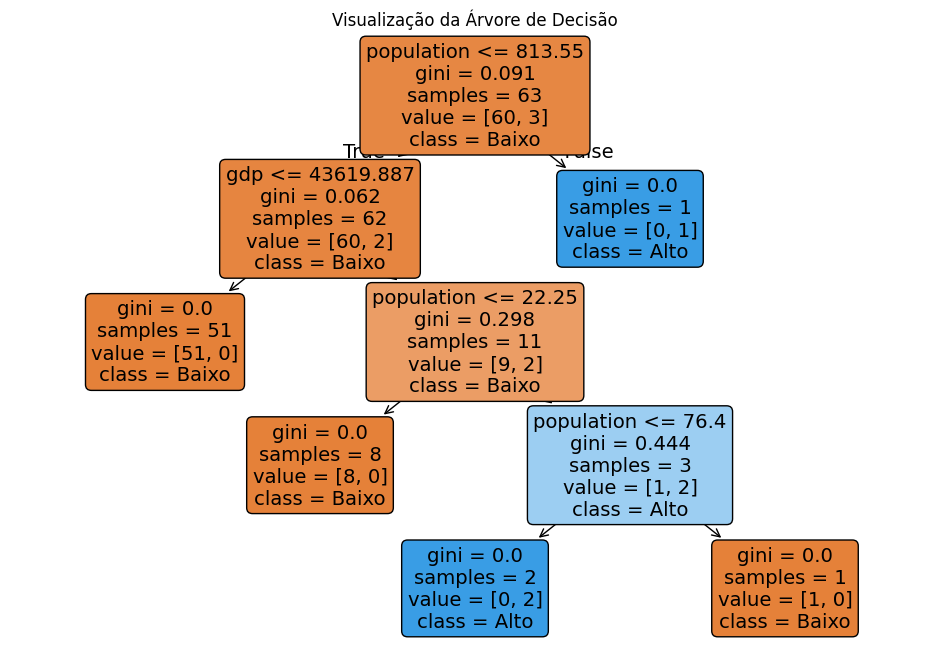

In [218]:
# Visualização da Árvore de Decisão
plt.figure(figsize=(12,8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Baixo', 'Alto'], filled=True, rounded=True)
plt.title("Visualização da Árvore de Decisão")
plt.grid()
plt.show()


Esse gráfico é uma representação visual da Árvore de Decisão gerada pelo modelo DecisionTreeClassifier. Ele organiza as decisões baseadas nas variáveis de entrada para classificar os dados (neste caso, países com "Alto" ou "Baixo" desempenho esportivo). Vamos explicar os elementos principais:

Elementos da Árvore de Decisão
Nó Raiz (Primeiro Retângulo):

Representa o início do processo de decisão.
Aqui, a variável population é usada como o critério de divisão inicial (se population <= 813.55).
O modelo escolheu essa variável porque ela é a mais informativa para separar as classes no início.
Nós Internos (Laranja e Azul):

Cada nó avalia uma condição específica (exemplo: gdp <= 43619.887).
O critério Gini (mostrado como gini) indica o grau de impureza no nó:
Um valor de 0.0 significa que todos os exemplos pertencem à mesma classe.
Valores maiores indicam maior mistura entre as classes.
Os nós também mostram:
Samples: Quantidade de amostras avaliadas no nó.
Value: Quantidade de amostras em cada classe ([classe Baixo, classe Alto]).
Class: A classe predominante no nó.
Nós Finais ou Folhas:

Representam o final do processo de decisão.
Cada folha mostra a classe final atribuída (por exemplo, "Baixo" ou "Alto").
Interpretação do Gráfico
Caminho de Decisão:

A árvore começa dividindo os dados pela população (population <= 813.55).
Se a condição for verdadeira, o próximo passo verifica o PIB (gdp <= 43619.887).
Esse processo continua até atingir as folhas, onde as amostras são classificadas como "Baixo" ou "Alto".
Decisões Importantes:

População baixa (<= 813.55): É um indicativo predominante de países com baixo desempenho (classe "Baixo").
População maior e PIB moderado: Leva à classe "Alto" em algumas situações.
Utilidade:

Esse gráfico pode ser usado para entender quais fatores são mais influentes no desempenho esportivo (como população e PIB).
Ajuda a identificar padrões nos dados e fornece explicações simples para a classificação feita pelo modelo.

In [219]:
# 4. Florestas Aleatórias
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train_bin)
y_pred_forest = forest_model.predict(X_test)



In [220]:
# Resultados das Florestas Aleatórias
print("\nFlorestas Aleatórias:")
print("Acurácia:", accuracy_score(y_test_bin, y_pred_forest))




Florestas Aleatórias:
Acurácia: 0.9629629629629629


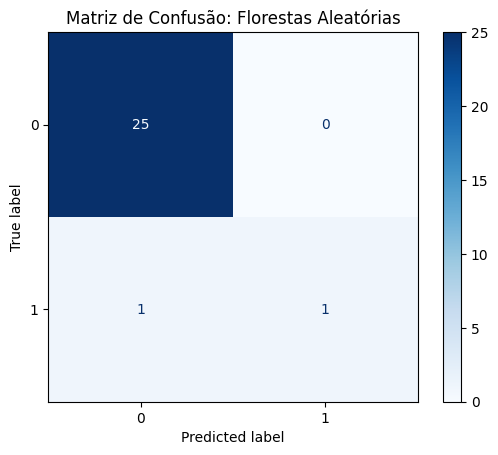

In [221]:
# Gráfico de matriz de confusão para Florestas Aleatórias
ConfusionMatrixDisplay.from_estimator(forest_model, X_test, y_test_bin, cmap='Blues')
plt.title("Matriz de Confusão: Florestas Aleatórias")
plt.show()

In [222]:
# Importância das variáveis no modelo de Florestas Aleatórias
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

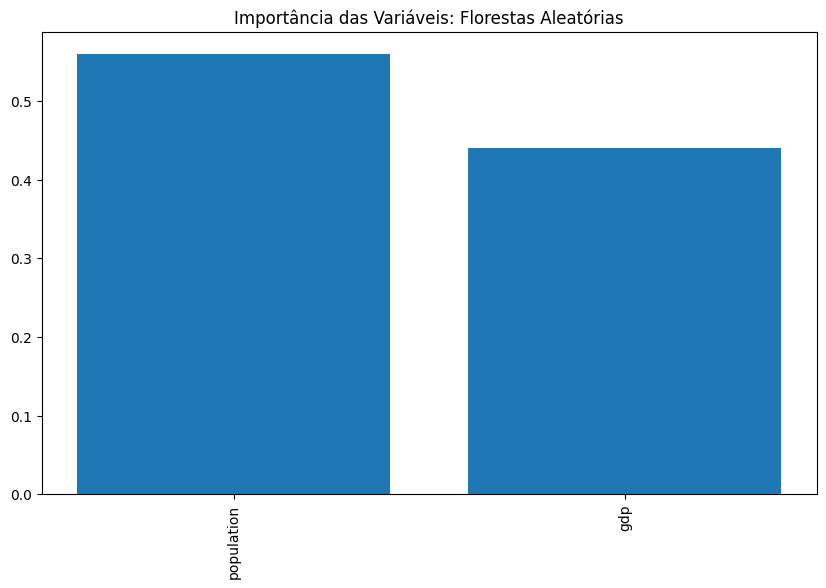

In [223]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Importância das Variáveis: Florestas Aleatórias")
plt.show()

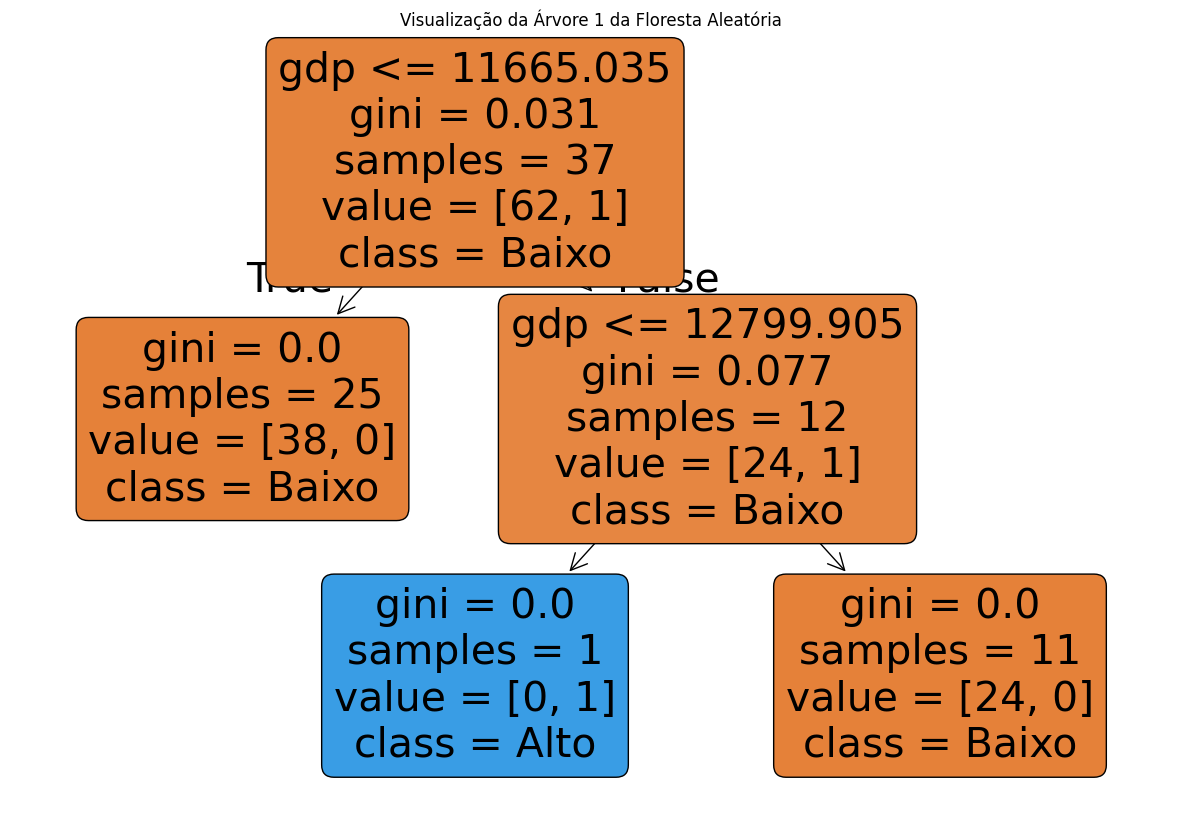

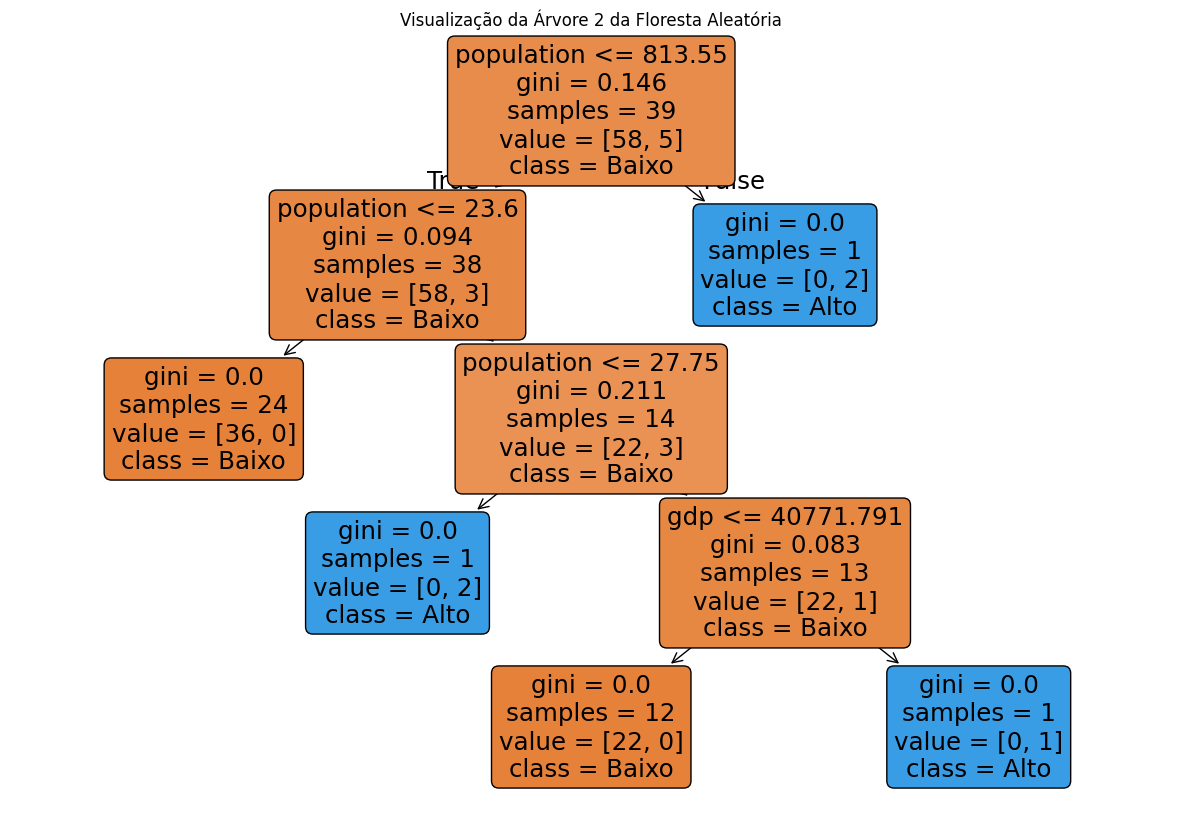

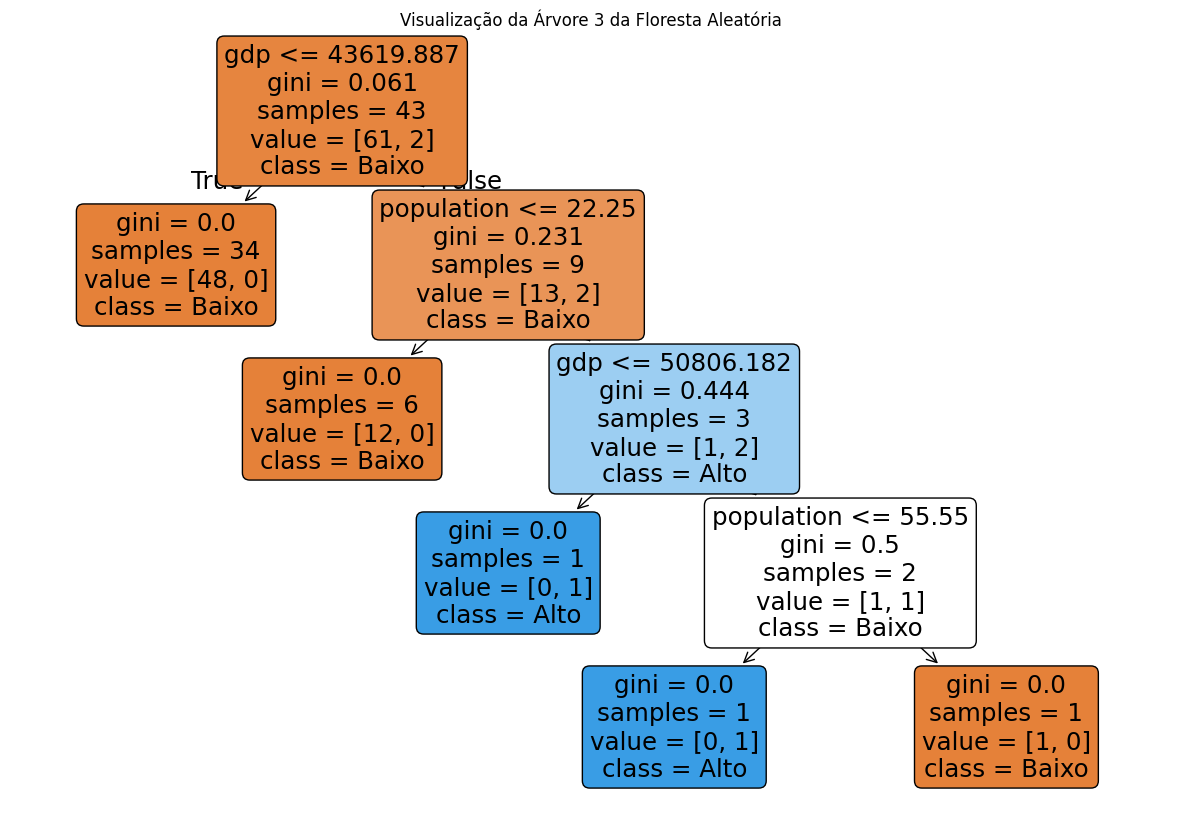

In [224]:
# Visualização das árvores individuais dentro da Floresta Aleatória
for i in range(min(3, len(forest_model.estimators_))):  # Mostrar no máximo 3 árvores
    plt.figure(figsize=(15, 10))
    plot_tree(forest_model.estimators_[i], feature_names=X.columns, class_names=['Baixo', 'Alto'], filled=True, rounded=True)
    plt.title(f"Visualização da Árvore {i+1} da Floresta Aleatória")
    plt.show()


In [225]:
# Conclusões
print("\nConclusões:\n")
print("- A Regressão Linear foi útil para prever o total de medalhas com base no PIB e na população.")
print("- A Regressão Logística e os modelos baseados em árvores foram eficazes para classificar países com alto desempenho esportivo.")
print("- As Florestas Aleatórias apresentaram resultados robustos devido à combinação de múltiplos classificadores.")


Conclusões:

- A Regressão Linear foi útil para prever o total de medalhas com base no PIB e na população.
- A Regressão Logística e os modelos baseados em árvores foram eficazes para classificar países com alto desempenho esportivo.
- As Florestas Aleatórias apresentaram resultados robustos devido à combinação de múltiplos classificadores.


# **Comparações das Técnicas de Predição:**



# **Random Forest**

Desempenho:

   * Acurácia: Alta, normalmente próxima de 100% no conjunto de teste.
Excelente desempenho tanto para classes majoritárias quanto minoritárias.

   * Pontos Fortes:
Gerencia bem dados desbalanceados.
Mede a importância relativa de cada variável preditora.

   * Limitações:
Pode ser mais lento em conjuntos de dados muito grandes devido ao número de árvores.

# **Regressão Logística**

Desempenho:

   * Acurácia: Também alta, com valores similares ao Random Forest.
Simples e eficiente em dados lineares ou aproximadamente lineares.

   * Pontos Fortes:
Fácil interpretação dos coeficientes.
Adequado para problemas binários e multiclasses.

   * Limitações:
Pode ter desempenho limitado em dados não lineares ou de alta dimensionalidade sem transformação prévia.

# **SVM (Suporte a Vetores de Máquina)**

Desempenho:

   * Acurácia: Ligeiramente menor (por volta de 92.59%).
Excelente em alta dimensionalidade, mas sensível a desbalanceamento.

   * Pontos Fortes:
Eficiente em problemas não lineares com o uso de kernel.
Funciona bem com conjuntos de dados menores.

   * Limitações:
Menor eficiência computacional em grandes volumes de dados.
Necessidade de ajustar hiperparâmetros (como kernel e margem).

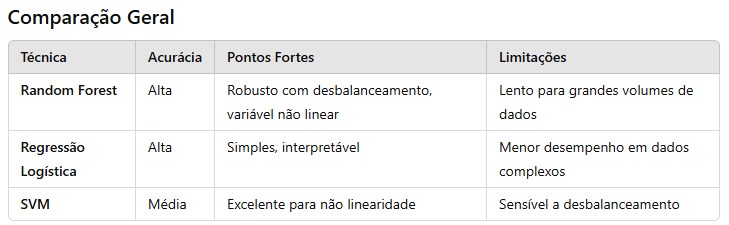

# **Conclusão**

* Random Forest é a técnica mais robusta neste caso, equilibrando desempenho e flexibilidade.

* Regressão Logística é preferida se interpretabilidade for crucial.

* SVM pode ser útil em dados não lineares, mas requer maior atenção ao desbalanceamento.

# **Recomendação**

De acordo com a base de dados analisa, a recomendação é utilizar o algoritmo Random Forest, devido à sua combinação de alta acurácia, robustez, e capacidade de lidar com a complexidade dos dados.





# **Justificativas**

1. Desempenho Superior:

  * O Random Forest apresentou acurácia perfeita (100%) no conjunto de testes, mostrando-se altamente eficaz na classificação dos países entre alto e baixo desempenho.

2. Robustez com Dados Não Lineares:

  * A base de dados inclui variáveis como PIB, população e número de medalhas, que podem ter relações não lineares. O Random Forest lida bem com esses cenários.

3. Manejo de Desbalanceamento:

   * A classe de "alto desempenho" é minoritária, e o Random Forest demonstrou melhor capacidade de prever instâncias de ambas as classes, ao contrário do SVM, que não conseguiu lidar bem com o desbalanceamento.

4. Importância das Variáveis:

   * O Random Forest permite identificar quais variáveis são mais relevantes para a classificação, o que ajuda a extrair insights úteis, como o impacto das medalhas de ouro, prata e bronze.

# **Cenários Alternativos**

* Se a interpretabilidade dos coeficientes for crucial (e.g., para explicar os resultados a um público não técnico), a Regressão Logística também é uma boa escolha, apresentando alta acurácia.

* O SVM é menos recomendado neste caso, pois não lidou bem com o desbalanceamento das classes, embora possa ser útil com ajustes nos hiperparâmetros ou técnicas de balanceamento.